In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
i=224
b=32

In [3]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle

Saving kaggle.json to kaggle.json


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
!kaggle datasets download -d maitridsavla/alzimer-segmented
!unzip -q alzimer-segmented.zip -d alz_segmented

Dataset URL: https://www.kaggle.com/datasets/maitridsavla/alzimer-segmented
License(s): unknown
  0% 0.00/32.4M [00:00<?, ?B/s]
100% 32.4M/32.4M [00:00<00:00, 728MB/s]


In [5]:
import os
os.listdir("alz_segmented")

['segmented_images']

In [6]:
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [7]:
train_data=train_gen.flow_from_directory(
    "alz_segmented/segmented_images/train",
    target_size=(i,i),
    batch_size=b,
    class_mode="categorical",
    subset="training"
)

Found 4098 images belonging to 4 classes.


In [8]:
val_data=train_gen.flow_from_directory(
    "alz_segmented/segmented_images/test",
    target_size=(i,i),
    batch_size=b,
    class_mode="categorical",
    subset="validation"
)

Found 254 images belonging to 4 classes.


In [9]:
class_indices=train_data.class_indices
class_name=list(class_indices.keys())

In [10]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(i,i,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(4,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(train_data,epochs=3,validation_data=val_data,batch_size=b)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
128/129 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4748 - loss: 1.0605

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.4756 - loss: 1.0593 - val_accuracy: 0.5748 - val_loss: 0.9311
Epoch 2/3
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.6516 - loss: 0.8159 - val_accuracy: 0.6102 - val_loss: 0.8775
Epoch 3/3
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.7921 - loss: 0.5029 - val_accuracy: 0.6457 - val_loss: 0.8596


In [13]:
model.save("/content/drive/MyDrive/alzhimer.h5")

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model("/content/drive/MyDrive/alzhimer.h5")
print("Model Load Successfully")

Model Load Successfully


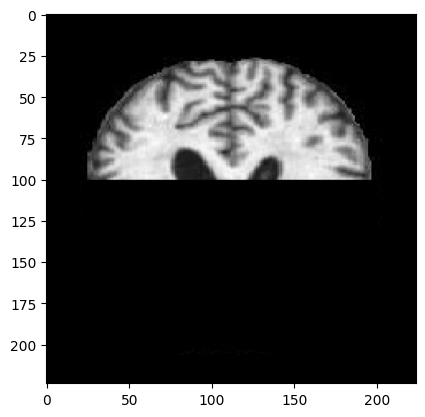

In [19]:
path="/content/28.jpg"
img=image.load_img(path,target_size=(i,i))
plt.imshow(img)
plt.axis()
plt.show()

In [20]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255
prediction=model.predict(img_array)
index=np.argmax(prediction[0])
print(class_name[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MildDemented
